In [393]:
# Importing required libraries
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_theme()

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# NLP

import string, re,nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords


from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer

# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

#Train_test split

from sklearn.model_selection import train_test_split, ParameterGrid

# Classifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score


In [281]:
# Importing Dataset
data = pd.read_csv('/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv', names= ['label','description'])
data = data[['description', 'label']]
data.shape

(50425, 2)

In [282]:
# taking a look at data
data.head()

,description,label
0,Paper Plane Design Framed Wall Hanging Motivat...,Household
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",Household
2,SAF 'UV Textured Modern Art Print Framed' Pain...,Household
3,"SAF Flower Print Framed Painting (Synthetic, 1...",Household
4,Incredible Gifts India Wooden Happy Birthday U...,Household


In [283]:
# Getting some insights
data.label.value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: label, dtype: int64

In [284]:
data.isna().sum()

description    1
label          0
dtype: int64

In [285]:
#Missing values and duplicate observations

print(f"Number of observation with missing values: {len(data)-len(data.dropna())}")
print(f"Number of duplicate observation: {data.duplicated().sum()}")

Number of observation with missing values: 1
Number of duplicate observation: 22622


In [308]:
data.duplicated().value_counts()

False    27803
True     22622
dtype: int64

In [309]:
# Dropping observation with missing values
data.dropna(inplace = True)

# Dropping duplicate observations

data.drop_duplicates(inplace = True)

data.reset_index(drop = True, inplace = True)

In [310]:
data.shape

(27802, 2)

In [311]:
# Mapping categorical data into numerical data
data['label'] = data['label'].map({"Electronics":0, "Household":1, "Books": 2, "Clothing & Accessories": 3}).astype(int)

In [313]:
# Getting insights
print(data.info())
print("\n")
print(data.shape)
print("\n")
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27802 entries, 0 to 27801
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  27802 non-null  object
 1   label        27802 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 434.5+ KB
None


(27802, 2)


              label
count  27802.000000
mean       1.442270
std        1.018194
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000


In [314]:
data

,description,label
0,Paper Plane Design Framed Wall Hanging Motivat...,1
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",1
2,SAF 'UV Textured Modern Art Print Framed' Pain...,1
3,"SAF Flower Print Framed Painting (Synthetic, 1...",1
4,Incredible Gifts India Wooden Happy Birthday U...,1
...,...,...
27797,Micromax Bharat 5 Plus Zero impact on visual d...,0
27798,Microsoft Lumia 550 8GB 4G Black Microsoft lum...,0
27799,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ...",0
27800,Karbonn Titanium Wind W4 (White) Karbonn Titan...,0


## Project Objective ##

The objective of the project is to classify a product beased on its description  available in the e-commerce platform, into the four categories, Electronics, Households, Books and Clothing & Accessories.

In [315]:
#Splliting dataset by labels

data_e = data[data["label"] == 0]
data_h = data[data["label"] == 1]
data_b = data[data["label"] == 2]
data_c = data[data["label"] == 3]

In [395]:
# Visualization of class frequencies
values = np.array([len(data_e), len(data_h), len(data_b), len(data_c)])
labels = ['Electronics', 'Household', 'Books', 'Clothing & Accessories']
fig = go.Figure(data = [go.Pie(values = values, labels = labels, hole = 0.5, textinfo = 'percent', title = " ")])
text_title = "Comparison of class frequencies"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

## Number of Characters ##

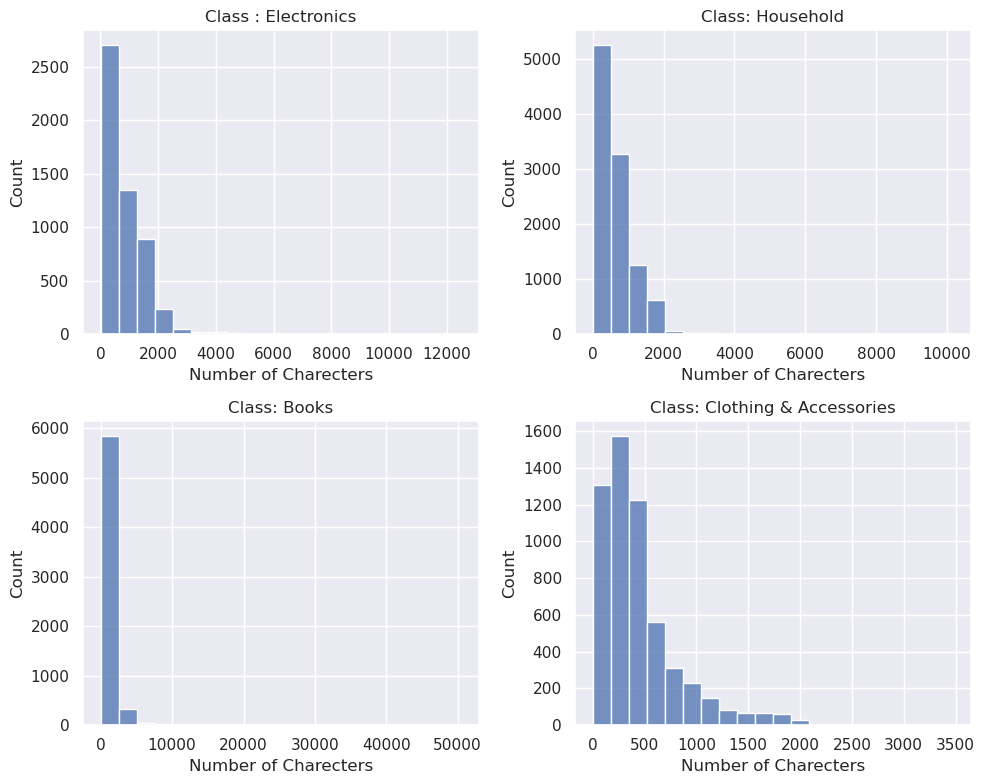

In [396]:
# Distribution of number of characters in description

data_e_char = data_e['description'].str.len()
data_h_char = data_h['description'].str.len()
data_b_char = data_b['description'].str.len()
data_c_char = data_c['description'].str.len()

plt.figure(figsize = (10,8))
plt.subplot(2,2, 1)
sns.histplot(x = data_e_char, bins = 20).set_title('Class : Electronics')
plt.xlabel("Number of Charecters")
plt.subplot(2,2,2)
sns.histplot(x = data_h_char, bins = 20).set_title('Class: Household')
plt.xlabel("Number of Charecters")
plt.subplot(2,2,3)
sns.histplot(x = data_b_char, bins = 20).set_title('Class: Books')
plt.xlabel("Number of Charecters")
plt.subplot(2,2,4)
sns.histplot(x = data_c_char, bins = 20).set_title('Class: Clothing & Accessories')
plt.xlabel("Number of Charecters")

plt.tight_layout()
plt.show()


## Number of Words ##

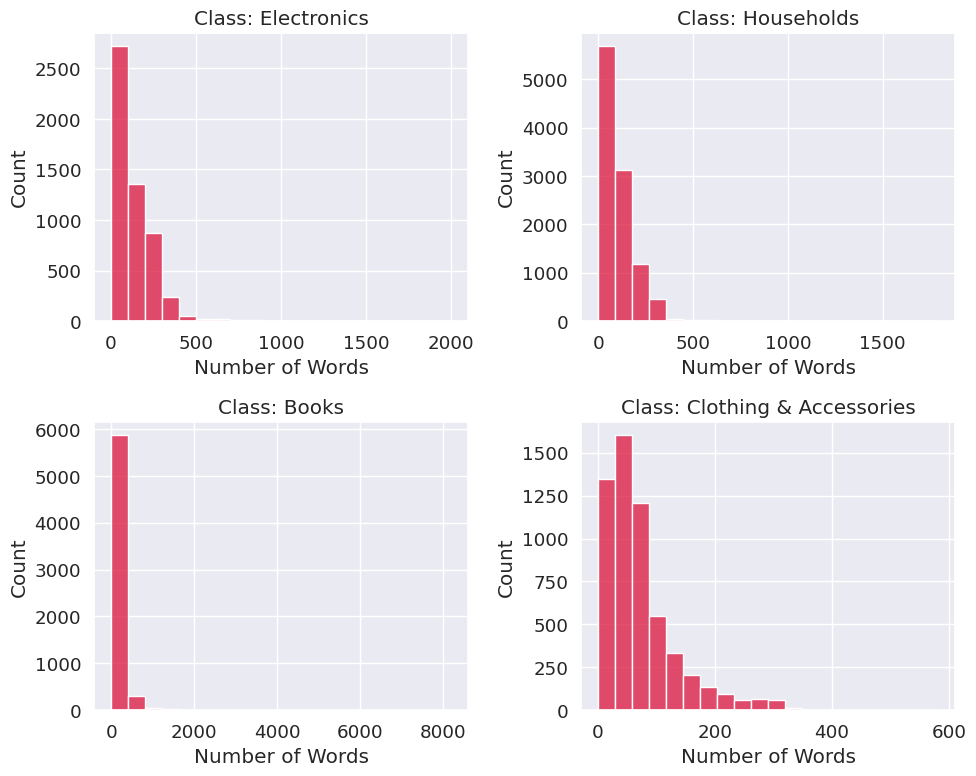

In [318]:
# Distribution of number of words in description
data_e_word = data_e['description'].str.split().map(lambda x: len(x))
data_h_word = data_h['description'].str.split().map(lambda x: len(x))
data_b_word = data_b['description'].str.split().map(lambda x: len(x))
data_c_word = data_c['description'].str.split().map(lambda x: len(x))

plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.histplot(x= data_e_word, bins = 20, color = 'crimson').set_title('Class: Electronics')
plt.xlabel('Number of Words')
plt.subplot(2,2,2)
sns.histplot(x= data_h_word, bins = 20, color = 'crimson').set_title('Class: Households')
plt.xlabel('Number of Words')
plt.subplot(2,2,3)
sns.histplot(x= data_b_word, bins = 20, color = 'crimson').set_title('Class: Books')
plt.xlabel('Number of Words')
plt.subplot(2,2,4)
sns.histplot(x= data_c_word, bins = 20, color = 'crimson').set_title('Class: Clothing & Accessories')
plt.xlabel('Number of Words')

plt.tight_layout()
plt.show()

## Average Word-length ##

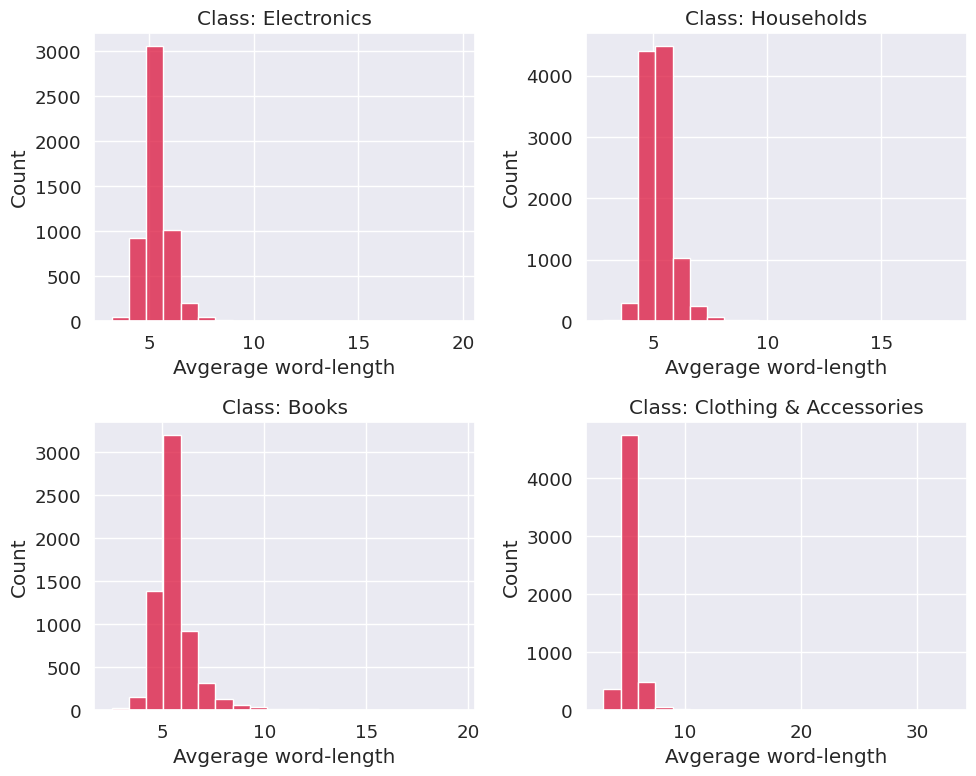

In [319]:
# Distribution of average word-length in description
data_e_avg = data_e['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_h_avg = data_h['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_b_avg = data_b['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_c_avg = data_c['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.histplot(x= data_e_avg, bins = 20, color = 'crimson').set_title('Class: Electronics')
plt.xlabel('Avgerage word-length')
plt.subplot(2,2,2)
sns.histplot(x= data_h_avg, bins = 20, color = 'crimson').set_title('Class: Households')
plt.xlabel('Avgerage word-length')
plt.subplot(2,2,3)
sns.histplot(x= data_b_avg, bins = 20, color = 'crimson').set_title('Class: Books')
plt.xlabel('Avgerage word-length')
plt.subplot(2,2,4)
sns.histplot(x= data_c_avg, bins = 20, color = 'crimson').set_title('Class: Clothing & Accessories')
plt.xlabel('Avgerage word-length')

plt.tight_layout()
plt.show()

## Data Splitting ##

In [320]:
#Feature Split
X,y = data.drop('label', axis=1), data['label']

# Train-test split(from complete data)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
data_train = pd.concat([X_train, y_train], axis = 1)

# Validation-test split (from test data)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)
data_val, data_test = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)


In [389]:
# Comparison of sizes of training set, validation set and test set
values = np.array([len(data_train), len(data_val), len(data_test)])
labels = ['Training set', 'Validation Set', 'Test set']
fig = go.Figure(data = [go.Pie(values = values, labels = labels, hole = 0.5, textinfo = 'percent', title = " ")])
text_title = "Comparison of sizes of training set, validation set and test set"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

## Text Normalization ##
Text normalization is a key step in natural language processing (NLP). It involves cleaning and preprocessing text data to make it consistent and usable for different NLP tasks. The process includes a variety of techniques such as case normalization, punctuation removal, stop word removal, stemming, and lemmatization.

In [22]:
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

# Convertion To Lower Case #

We convert the sentences in NLP to lowercase in order to avoid treating same words differently. For example Amazon and amazon will be treated differently if not converted into lower case

In [23]:
# Converting to lower case
def to_lowercase(text):
    return text.lower()

## Removal of Whitespace ##

In [24]:
def remove_whitespace(text):
    return text.strip()

## Removal Of Punctuations ##

Punctuatuons will not play a role in classifying categories. Therefore, we remove them in order to make the data more clean and for bette accuracy. Apostrophe is used in contraction, it will not be removed to keep the contracitons intact

In [25]:
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "")
    return text.translate(str.maketrans("","", punct_str))

## Removal of Unicode Characters ##
Unicode characters can make the data more messy so cleaning the unicode characters is must.


In [26]:
# Removing HTML tags

def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

# Removing Emojis

def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text) # no emoji

# removeing special characters

def remove_special(text):
    pattern = re.compile(r"\\u00AE|\\u00a9|\\u2122")
    return pattern.sub(r'', text)

# removing ither unicode character

def remove_http(text):
    text = re.sub(r'https\S+', '', text)
    return text


## Expanding Contractions ##

In [27]:
def decontraction(phrase):
    hrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"&", "and", phrase)
    return phrase

    
def remove_escape_sequences(text):
    text=text.replace(r"\n","")
    text=text.replace(r"\t","")
    text=text.replace(r"\r","")
    return text

## Removing Stopwords ##

The words which are generally filtered out before processing a natural language are called stop words. These are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and does not add much information to the text. Examples of a few stop words in English are “the”, “a”, “an”, “so”, “what”.

Why do we remove stop words? 🤷‍♀️
Stop words are available in abundance in any human language. By removing these words, we remove the low-level information from our text in order to give more focus to the important information. In order words, we can say that the removal of such words does not show any negative consequences on the model we train for our task.

Removal of stop words definitely reduces the dataset size and thus reduces the training time due to the fewer number of tokens involved in the training

In [28]:
stops = stopwords.words("english")
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"] # additional stopwords
allstops = stops + addstops
print(allstops)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
# Function to remove stopwords
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])

## Spelling Correction ##
In Natural Language Processing it’s important that spelling errors should be as less as possible so that whatever we are making should be highly accurate.

In [30]:
from textblob import TextBlob
def spellcheck(text):
    word_list = regexp.tokenize(text)
    word_list_corrected = []
    for word in word_list:
        correct_spell = str(TextBlob(word).correct())
        word_list_corrected.append(correct_spell)
        
    text_corrected = " ".join(word_list_corrected)
    return text_corrected  

## Stemming and Lemmatization ##

**Stemming** is the process of getting the root form of a word. Stem or root is the part to which inflectional affixes are added. The stem of a word is created by removing the prefix or suffix of a word. It goes back to the etymology of the word. Languages evolve over time. Many different languages branch into each other; for example, English is a derivative of Latin. Thus, stemming a word takes it back to the root word.

**lemmatization** also converts a word to its root form. However, the difference is that lemmatization ensures that the root word belongs to the language one is dealing with, in our case it is English. If we use lemmatization the output would be in English.


In [31]:
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])

def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    return text_spacy

## Removing Non-alphabetic words ##
The non-alphabetic words are not numerous and create unnecessary diversions in the context of classifying texts. Hence we discard these words.

In [32]:
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

## POS Tagging ##

Part-of-speech (POS) tagging is a popular Natural Language Processing process which refers to categorizing words in a text (corpus) in correspondence with a particular part of speech, depending on the definition of the word and its context.

In [33]:
def keep_pos(text):
    tokens = regexp.tokenize(text)
    token_tagged = nltk.pos_tag(tokens)
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW', 'PRP', 'PRPS', 'RB', 'RBR', 'RBS', 
                 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WPS', 'WRB']
    
    keep_words = [x[0] for x in token_tagged if x[1] in keep_tags]
    return " ".join(keep_words)

## Integrating different functions ##
Skipping spell check as it's taking a very long time. My system's not so powerful. 😿😥

In [35]:
def text_normalizer(text):
    text = to_lowercase(text)
    text = remove_whitespace(text)
    text = remove_punctuation(text)

    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = decontraction(text)
    text = remove_stopwords(text)
#     text = spellcheck(text)
    text = text_lemmatizer(text) 
    text = discard_non_alpha(text)
    text = keep_pos(text)
    return text

## Applying Text normalization on product description ##



In [401]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [ ]:
data_train_norm, data_val_norm, data_test_norm = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
data_train_norm['normalized description'] = data_train['description'].progress_apply(lambda x: text_normalizer(x))

  0%|          | 0/22241 [00:00<?, ?it/s]

In [38]:
data_val_norm['normalized description'] = data_val['description'].progress_apply(text_normalizer)
data_test_norm['normalized description'] = data_test['description'].progress_apply(text_normalizer)

data_train_norm['label'] = data_train['label']
data_val_norm['label'] = data_val['label']
data_test_norm['label'] = data_test['label']


  0%|          | 0/2780 [00:00<?, ?it/s]

  0%|          | 0/2781 [00:00<?, ?it/s]

In [65]:
data_train_norm

,normalized description,label
4329,docoss pemium steel pin cloth door hook rail h...,1
17238,men polyster training gyme design exercisejogg...,3
16330,ctet tet study pedagogy class iv author editor...,2
18319,kid girls print pack blueblackredpurplerose,3
18666,fims woman girl satin nylon lycra spandex way ...,3
...,...,...
13123,concise knowledge,2
19648,manq man check blazer singlebreaste button che...,3
9845,inditradition kitchen sink liquid brush cloth ...,1
10799,autobiography benjamin franklin author england...,2


## TF-IDF Modeling ##
In the context of information retrieval, TF-IDF (short for term frequency-inverse document frequency), is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

**It objectively evaluates how relevant a word is to a text in a collection of texts, taking into consideration that some words appear more frequently in general.**

* Text Vectorization
* TF-IDF Baseline Modeling
* TF-IDF Hyperparameter Tuning

## Text Vectorization ##
Text vectorization is the process of converting textual data in a numerical data (vectors) which can be understood by a machine learning model.

In [188]:
# Feature and labels
X_train_norm, y_train = data_train_norm["normalized description"].tolist(), data_train_norm["label"].tolist()
X_val_norm, y_val = data_val_norm["normalized description"].tolist(), data_val_norm["label"].tolist()
X_test_norm, y_test = data_test_norm["normalized description"].tolist(), data_test_norm["label"].tolist()


In [235]:
# TF-IDF vectorization
TfidfVec = TfidfVectorizer(ngram_range = (1,1))
X_train_tfidf = TfidfVec.fit_transform(X_train_norm)
X_val_tfidf = TfidfVec.transform(X_val_norm)
X_test_tfidf = TfidfVec.transform(X_test_norm)

## TF-IDF Baseline Modeling ##

In [190]:
# Classifiers
names = [
    "Logistic Regression",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "XGBoost"
]

models = [
    LogisticRegression(max_iter = 1000),
    KNeighborsClassifier(n_neighbors = 149, n_jobs = -1),
    DecisionTreeClassifier(),
    svm.SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 100),
    XGBClassifier(),
]

In [191]:
# Function to return summary of baseline models
def score(X_train, y_train, X_val, y_val, names = names, models = models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    for model in models:
        model.fit(X_train, y_train)
        y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))
    
    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"] = names, score_train, score_val
    score_df.sort_values(by = 'Validation accuracy', ascending = False, inplace = True)
    return score_df

In [192]:
score(X_train_tfidf, y_train, X_val_tfidf, y_val, names = names, models = models)

,Classifier,Training accuracy,Validation accuracy
3,Linear SVM,0.978283,0.953957
0,Logistic Regression,0.966413,0.948561
4,Random Forest,0.999775,0.926259
5,XGBoost,0.959534,0.922662
1,KNN Classifier,0.913313,0.915468
2,Decision Tree,0.999820,0.875540


## TF-IDF Hyperparameter Tuning ##

Considering the validation score form above, we seee that SVM performs best. So choosing it as best baseline model we will tune it's hyperparameters in order to enhance the performance of SVM classifier.

In [193]:
svm_classifier = svm.SVC()
params_svm = {
    'kernel':['linear'],
    'C': [0.1, 1, 10, 100]
}

In [50]:
import time

In [194]:
# performing grid search for the best parameters
best_model_svm, best_params_svm, best_score_svm, count = svm_classifier, ParameterGrid(params_svm)[0], 0, 0
for g in ParameterGrid(params_svm):
    time_start = time.time()
    count+=1
    print(f"Gridpoint #{count}: {g}")
    svm_classifier.set_params(**g)
    svm_classifier.fit(X_train_tfidf, y_train)
    y_train_pred, y_val_pred = svm_classifier.predict(X_train_tfidf), svm_classifier.predict(X_val_tfidf)
    score_train, score_val = accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)
    time_stop = time.time()
    m, s = int(time_stop - time_start) // 60, int(time_stop - time_start) % 60
    print(f"Training accuracy: {score_train}, Validation accuracy: {score_val}, Runtime: {m}m{s}s")
    print(" ")
    if score_val > best_score_svm:
        best_params_svm, best_score_svm = g, score_val
    
best_model_tfidf, best_params_tfidf, best_score_tfidf = svm.SVC(), best_params_svm, best_score_svm
best_model_tfidf.set_params(**best_params_tfidf)
print(f"Best model: {best_model_tfidf}")
print(" ")
print(f"Best parameters: {best_params_tfidf}")
print(f"Best validation accuracy: {best_score_tfidf}")


Gridpoint #1: {'C': 0.1, 'kernel': 'linear'}
Training accuracy: 0.9348950137134122, Validation accuracy: 0.9251798561151079, Runtime: 2m10s
 
Gridpoint #2: {'C': 1, 'kernel': 'linear'}
Training accuracy: 0.9782833505687694, Validation accuracy: 0.9539568345323741, Runtime: 1m19s
 
Gridpoint #3: {'C': 10, 'kernel': 'linear'}
Training accuracy: 0.9977968616519042, Validation accuracy: 0.9435251798561151, Runtime: 1m24s
 
Gridpoint #4: {'C': 100, 'kernel': 'linear'}
Training accuracy: 0.9990108358437121, Validation accuracy: 0.939568345323741, Runtime: 1m21s
 
Best model: SVC(C=1, kernel='linear')
 
Best parameters: {'C': 1, 'kernel': 'linear'}
Best validation accuracy: 0.9539568345323741


## Final Prediction & Evaluation ##

The model with highest validation accuracy is used to predict the labels for the test data.

In [74]:
# Function to compute and print confusion matrix
def conf_mat(y_test, y_test_pred, figsize = (10, 8), font_scale = 1.2, annot_kws_size = 16):
    class_names = [0, 1, 2, 3] # ['Electronics', 'Household', 'Books', 'Clothing & Accessories']
    tick_marks_y = [0.5, 1.5, 2.5, 3.5]
    tick_marks_x = [0.5, 1.5, 2.5, 3.5]
    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    confusion_matrix_df = pd.DataFrame(confusion_matrix, range(4), range(4))
    plt.figure(figsize = figsize)
    sns.set(font_scale = font_scale) # label size
    plt.title("Confusion Matrix")
    sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {"size": annot_kws_size}, fmt = 'd') # font size
    plt.yticks(tick_marks_y, class_names, rotation = 'vertical')
    plt.xticks(tick_marks_x, class_names, rotation = 'horizontal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.show()

Test accuracy    0.961165
 


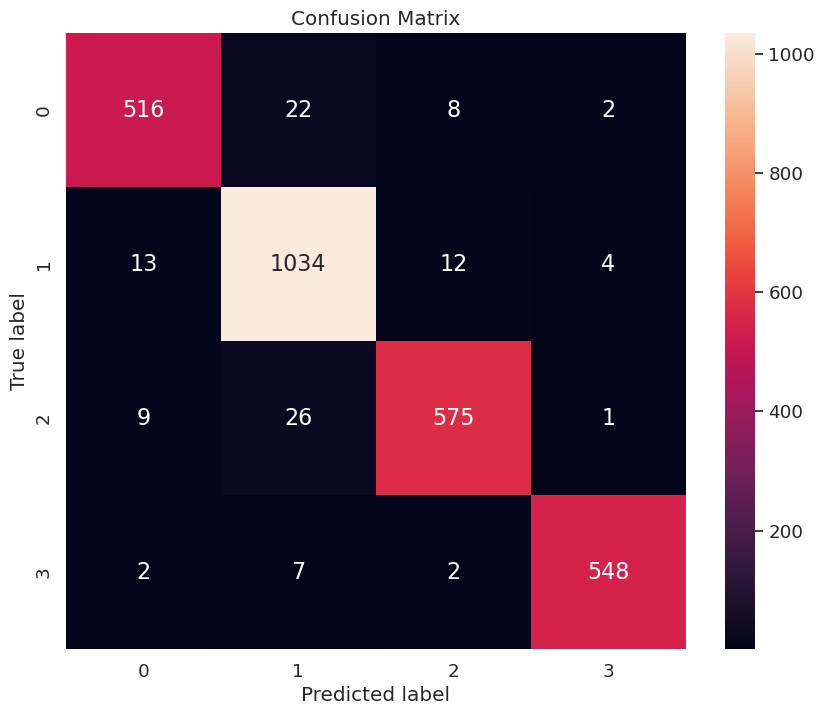

In [195]:
model, X_train_vec, X_test_vec = best_model_tfidf, X_train_tfidf, X_test_tfidf

model.fit(X_train_vec, y_train)
y_test_pred = model.predict(X_test_vec)
score_test = accuracy_score(y_test, y_test_pred)

print(pd.Series({"Test accuracy": score_test}).to_string())
print(" ")
conf_mat(y_test, y_test_pred, figsize = (10, 8), font_scale = 1.2, annot_kws_size = 16) # Confusion matrix

# Testing Custom Inputs ##

In [274]:
# A function to test custom description
def predict_custom(inp):
    df = pd.DataFrame([inp], columns = ['text'])
    test_1 = df['text'].apply(text_normalizer).tolist()
    test_tfidf = TfidfVec.transform(test_1)
    prediction = model.predict(test_tfidf)
    prediction = prediction[0]

    interpretations = {
        2 : "Books",
        3 : "Clothing and Accessories",
        0 : "Electronics",
        1 : "Household"
    }
    for i in interpretations.keys():
        if i == prediction:
            z =  interpretations[i]
    return z
        
        

In [268]:
inp1 =inp1 = "A Dance with Dragons: A Song of Ice and Fire: Book Five Review “Filled with vividly rendered set pieces, unexpected turnings, assorted cliffhangers and moments of appalling cruelty, A Dance with Dragons is epic fantasy as it should be written: passionate, compelling, convincingly detailed and thoroughly imagined.”—The Washington Post   “Long live George Martin . . . a literary dervish, enthralled by complicated characters and vivid language, and bursting with the wild vision of the very best tale tellers.”—The New York Times   “One of the best series in the history of fantasy.”—Los Angeles Times  About the Author George R.R. Martin sold his first story in 1971 and has been writing professionally since then. He spent ten years in Hollywood as a writer-producer, working on The Twilight Zone, Beauty and the Beast, and various feature films and television pilots that were never made. In the mid '90s he returned to prose, his first love, and began work on his epic fantasy series, A Song of Ice and Fire. He has been in the Seven Kingdoms ever since. Whenever he's allowed to leave, he returns to Santa Fe, New Mexico, where he lives with the lovely Parris, a big white dog called Mischa, and two cats named Augustus and Caligula, who think they run the place. 				    	 					              See all Product description"
print("prediction inp1: ", predict_custom(inp1))

prediction inp1:  Books


In [269]:
# Household
inp2 = "KEZRO Men's Wallet (Brown)"
print("prediction inp1: ", predict_custom(inp2))


prediction inp1:  Household


In [270]:
# Clothing and accessories
inp3= "Mushkiya ABD-026 C-Cut Double Layer Abaya burkha for women girl About Mushkiya Mushkiya is an international islamic clothing brand that represents style and modest clothing since 2006. Founded in Dubai , Mushkiya works on a basis of creativity and responsibility, fused with a modesty of islamic clothing.Fashion with modesty are at the heart of the brand’s philosophy. Product Description Simple yet trendy Abaya Dress in double layer and frills on shoulders would become your favourite in no time. This whimsical 'C-Cut' Abaya Dress Is made of Nida-Matt fabric which is soft, breathable and has a great fall. Pinping on the front layer, enhances the look of the Abaya. This Abaya can also be used as a Dress or a Burqa if you prefer colorful ones."
print("prediction inp1: ", predict_custom(inp3))

prediction inp1:  Clothing and Accessories


In [271]:
# Electronics
inp4 = "Sony DVD Printable Blanks with White Surface -Jar Pack of 100 This product is a must have for many around the world. As it gives it's users the experience they truly desire for."
print("prediction inp1: ", predict_custom(inp4))

prediction inp1:  Electronics


In [272]:
inp5 = "SAF 'Floral Framed Painting (Wood, 30 inch x 10 inch, Special Effect UV Print Textured, SAO297) Pai..."
print("prediction inp1: ", predict_custom(inp5))

prediction inp1:  Household


In [278]:
inp6 = '''Dinnerware set for every day use, indoors or out; ideal for any kitchen
Includes a 16-piece set with 4 dinner plates, 4 salad/dessert plates, 4 bowls, and 4 coffee/tea mugs; service for 4
Made of lightweight yet durable BPA-free AB-grade porcelain with a white finish
Dishwasher-safe, freezer-safe, and microwave-safe; plates can withstand heat up to 572 degrees F
Product dimensions: 10.5 inches (W, dinner plate), 7.5 inches (W, salad plate), 5.5 x 2.8 inches (WxH, bowl), and 4 inches (H, mug)'''
print("prediction inp1: ", predict_custom(inp6))

prediction inp1:  Household


## It looks like it is working fine. yay!!🥳🥳 ##